<a href="https://colab.research.google.com/github/ACM-Research/parametric-design-sustainable-living/blob/main/XGBoost_SpecifyParameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[17:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0, 0.5, 'Predicted GWP')

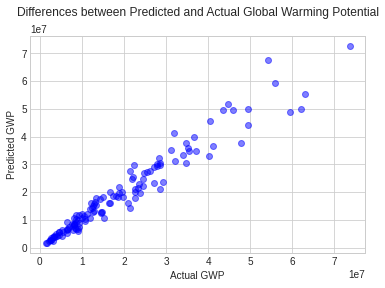

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

#reading in the data 
x_train_data = pd.read_excel('training.xlsx')
validation = pd.read_excel('validation.xlsx')

# drop columns that are not relevant to our purposes
x_train_data = x_train_data.drop(columns=['Option','location','floorplan'])
validation = validation.drop(columns=['Option','location','floorplan'])

# separate target from the features in training 
target_train = x_train_data['Observed GWP (assessed)'].values
x_train_data = x_train_data.drop(['Observed GWP (assessed)'], axis = 1)

#separate target from features in validation
target_valid = validation['Observed GWP (assessed)'].values
validation = validation.drop(['Observed GWP (assessed)'], axis = 1)



#set up the model
model = XGBRegressor(n_estimators = 99, max_depth = 8, random_state = 0)
model.fit(x_train_data, target_train)

# uncomment to enter your own parameters
#buildHeight = float(input("Please enter a Building Height:\n"))
#buildLength = float(input("Please enter a Building Length:\n"))
#buildWidth = float(input("Please enter a Building Width:\n"))
#floorArea = float(input("Please enter a Floor Area:\n"))
#orientation = int(input("Please enter an Orientation:\n"))
#roomWidth = float(input("Please enter a Room Width:\n"))
#mRoomLength = float(input("Please enter a Meeting Room Length:\n"))
#mRoomWidth = float(input("Please enter a Meeting Room Width:\n"))
#roomLength = float(input("Please enter a Room Length:\n"))
#passWidth = float(input("Please enter a Pass Width:\n"))
#elevationHeight = float(input("Please enter an Elevation Height:\n"))
#roomNumber = float(input("Please enter the number of rooms:\n"))
#meetingRoomNumber = float(input("Please enter the number of Meeting Rooms:\n"))
#floorNumber = float(input("Please enter a floor number:\n")

#newCalc = pd.DataFrame([[buildHeight,buildLength,buildWidth,floorArea,orientation,roomWidth,mRoomLength,mRoomWidth,roomLength,passWidth,elevationHeight,roomNumber,meetingRoomNumber,floorNumber]],columns=['buildingheight','buildinglength','buildingwidth','floorarea','orientation','roomwidith','mroomlength','mroomwidith','roomlength','passwidth','elevationheight','roomnumber','meetingroomnumber','floornumber'])
#newPredictions = model.predict(newCalc)

#get predictions
predictions = model.predict(validation)

#calculate the mean absolute error
mae = mean_absolute_error(predictions, target_valid)


plt.plot(target_valid,predictions,'o', alpha=0.5, color='blue')
plt.title("Differences between Predicted and Actual Global Warming Potential", pad=20)
plt.xlabel("Actual GWP")
plt.ylabel("Predicted GWP")
